Runtimes: [131.5299518108368, 136.93773484230042, 131.8199486732483, 146.75882601737976, 132.13822865486145, 126.19375133514404, 122.97336530685425, 123.7302098274231, 138.2909541130066, 132.65375900268555, 139.0282437801361]
1462.0549733638763

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis, wasserstein_distance

In [2]:
timer_df = pd.read_csv("benchmark_timers.csv",index_col=0)
timer_df.head()
timer_grps = timer_df.groupby(['Weight Adjustments','Total Delay'])
timer_grps.mean()

50.0_pct_tot_delay  67.0_pct_tot_delay  \
Weight Adjustments Total Delay                                           
With               10ms Delay            18.112258           18.439449   
                   1ms Delay             17.956834           17.908902   
Without            10ms Delay            18.180575           18.108863   
                   1ms Delay             18.912041           18.242348   

                                83.0_pct_tot_delay  100.0_pct_tot_delay  
Weight Adjustments Total Delay                                           
With               10ms Delay            18.247680            18.384801  
                   1ms Delay             18.122752            17.882141  
Without            10ms Delay            18.551446            18.481156  
                   1ms Delay             18.696889            18.145206

In [4]:
mean_timers = timer_grps.mean()
mean_timers.values


array([[3.29986305, 3.34991961, 3.32128925, 3.35425148],
       [3.22597756, 3.30881925, 3.37121344, 3.35435414],
       [3.38453531, 3.29869351, 3.30192819, 3.39704771],
       [3.36479783, 3.39516201, 3.30677199, 3.39431844]])

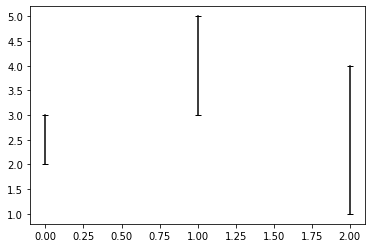

In [77]:
plt.plot([0,0],[2,3],color="black", marker="_")
plt.plot([1,1],[3,5],color="black", marker="_")
plt.plot([2,2],[1,4])


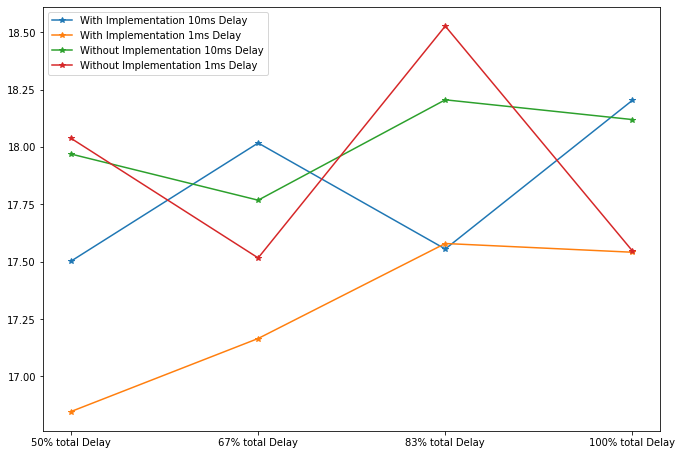

In [6]:
mean_timers = timer_grps.mean()
min_timers = timer_grps.min()
std_timers = timer_grps.std()
#max_timers = timer_grps.max()
labs = ['50% total Delay', '67% total Delay', '83% total Delay', '100% total Delay']

yerr_low = mean_timers.values - std_timers.values
yerr_max = std_timers.values + mean_timers.values

fig = plt.figure(figsize = (16.6/1.5, 11.7/1.5))
plt.plot(min_timers.values.T,label=[i+' Implementation '+j for i,j in mean_timers.index], marker='*', linewidth=1.5)
plt.xticks(ticks=[0,1,2,3],labels= labs)
plt.grid
# plt.yticks(ticks=np.linspace(3.225,3.4,8), labels=np.linspace(3.225,3.4,8)*10)
plt.legend()
for i in range(0,16):
    clrs = ['blue','orange','green','red']
#     plt.plot([i%4, i%4], [min_timers.values[i//4,i%4],max_timers.values[i//4,i%4]] ,color=clrs[i//4], marker="_",linewidth=0.5)
#     plt.plot([i%4, i%4], [yerr_low[i//4,i%4],yerr_max[i//4,i%4]] ,color=clrs[i//4], marker="_",linewidth=0.5*(i//4+1),markersize =16)
#plt.savefig('Benchmarks with error plots.pdf',pad_inches=0.05,bbox_inches='tight')

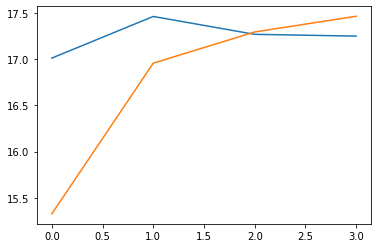

In [4]:
timer_grps.min()

50.0_pct_tot_delay  67.0_pct_tot_delay  \
Weight Adjustments Total Delay                                           
With               10ms Delay            17.502728           18.017855   
                   1ms Delay             16.847038           17.165406   
Without            10ms Delay            17.969704           17.768531   
                   1ms Delay             18.038310           17.516779   

                                83.0_pct_tot_delay  100.0_pct_tot_delay  
Weight Adjustments Total Delay                                           
With               10ms Delay            17.555657            18.203954  
                   1ms Delay             17.579648            17.541548  
Without            10ms Delay            18.206139            18.120031  
                   1ms Delay             18.527686            17.547467

,10.0seconds,10.0seconds
id,,
0,38.500000,38.500000
1,-192.500000,-192.500000
2,16.863615,16.254468
3,19.248483,19.444010
4,19.581878,19.359017


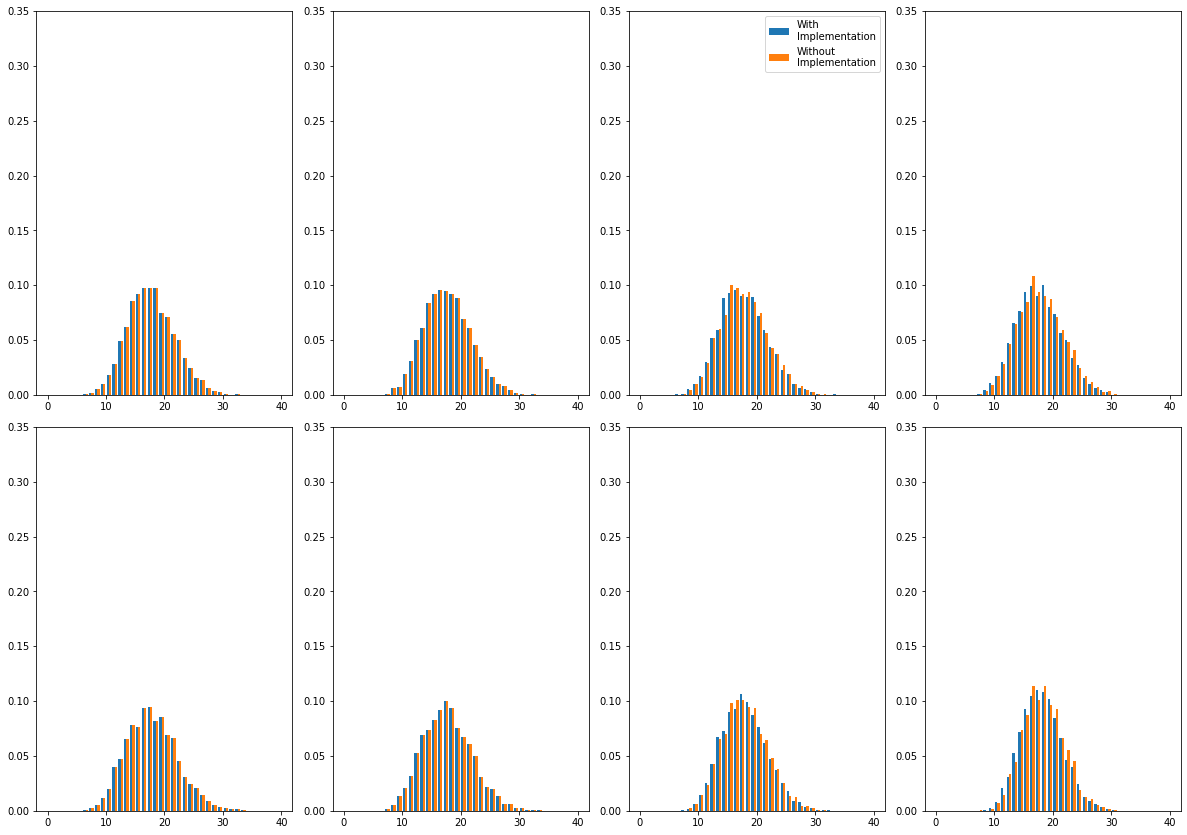

In [8]:
arr = []
axd = [0., 0.5]
axd += [0.75, 1.0]
fig = plt.figure(figsize = (16.6, 11.7))
k=0
for j in [1.0, 10.0]:
    temp = []
    for i in axd:
        k+=1
        i = i * j
        label_text = ['With\nImplementation','Without\nImplementation']
        
        stdp_ax_del = pd.read_csv('ax_del_a_'+str(i)+"_delay_"+str(j)+'.csv',index_col=[0])
        stdp_pl_hom = pd.read_csv('ax_del_a_'+str(i)+"_delay_"+str(j)+'_regular.csv',index_col=[0])
        op = pd.concat([stdp_ax_del, stdp_pl_hom], axis = 1)
        
        wd = wasserstein_distance(stdp_ax_del.values.flatten()[2:], stdp_pl_hom.values.flatten()[2:])
        temp.append(wd)
        
        ax = plt.subplot(2, 4, k)
        
        ax.hist(op.values, 40, range=(0,40), label = label_text, alpha =1, density=True, linewidth=3)
        """if i==10.0:
            ax.hist(op.values, 30, range=(0, 50), label = label_text)
        elif i==7.5:
            ax.hist(op.values, 30, range=(0, 50), label = label_text)
        else:
            ax.hist(op.values, 30, range=(0, 50), label = label_text)
        """
        
        # ax.set_title(str(i)+' second(s) Axonal Delay')
        ax.set_ylim(0,0.35)
        # if i == 0.0:
            # ax.set_ylabel('Delay: '+str(j)+' Second(s)')
        if i == 0.75 and j==1.0:
            ax.legend()
    arr.append(temp)
        
        
#fig.text(0.5, 0.04, 'STDP Synaptic Weights', ha='center',fontsize = 16)
plt.tight_layout()
# arr.append(temp.values.flatten())
# plt.savefig('wts_alpha_ax.pdf',pad_inches=0.05,bbox_inches='tight')
op.head()

# Normalize Hist
# Column, title & ticks formatting, row title in caption
# Add Axes labels
# Change to ms
# Synaptic weights units pA
# Legend in only one plots
# Step plot, alpha (transp) low

#Change alpha parameter so that the firing rates b/w 6,8.. 
# Check: Increase alpha --> decrease f.r. (only check for one case)

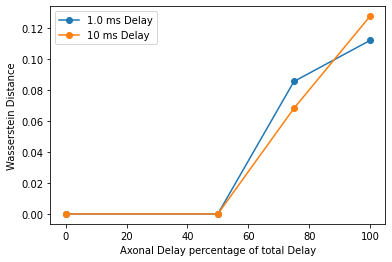

In [9]:
plt.plot([0,50,75,100],arr[0], label = '1.0 ms Delay', marker = 'o')
plt.plot([0,50,75,100],arr[1], label = '10 ms Delay', marker = 'o')
plt.xlabel('Axonal Delay percentage of total Delay')
plt.ylabel('Wasserstein Distance')
plt.legend()
plt.savefig('Change in Histogram.pdf')

# Fraction of total delay in x-axis in Fig. Caption
# More data points b/w 50 & 100
# Table of changes in Mean & Std

In [32]:
i = 0.75
j =1.0

stdp_ax_del = pd.read_csv('ax_del_'+str(i)+"_delay_"+str(j)+'.csv',index_col=[0])
stdp_pl_hom = pd.read_csv('ax_del_'+str(i)+"_delay_"+str(j)+'_regular.csv',index_col=[0])
stdp_ax_del.head(), stdp_pl_hom.head()

(    0.75seconds
 id             
 0     38.500000
 1   -192.500000
 2     69.937541
 3     70.788246
 4     68.664482,
     0.75seconds
 id             
 0     38.500000
 1   -192.500000
 2     69.937541
 3     70.788246
 4     68.664482)

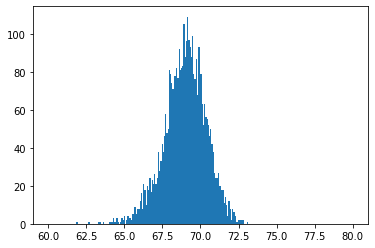

In [3]:
b,c,d = plt.hist(a,250,(60,80))
# for i in d:
# plt.bar_label(d)
plt.show()


# Show only for non zero values change width of bar

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html


In [4]:
b = pd.read_csv('ax_delay_many_to_one_0.8.csv',index_col=[0])

In [5]:
llimit = np.percentile(a.values, 0.5)
ulimit = np.percentile(a.values, 99.5)
new = a.values[llimit<a.values]
new = new[new<ulimit]

shapiro(new)
#P-value lowe 

ShapiroResult(statistic=0.9940186738967896, pvalue=1.9522444424935337e-11)

In [6]:
llimit = np.percentile(b.values, 0.5)
ulimit = np.percentile(b.values, 99.5)
new1 = b.values[llimit<b.values]
new1 = new1[new1<ulimit]

shapiro(new1)

ShapiroResult(statistic=0.9912077188491821, pvalue=1.3741386704186308e-14)

In [7]:
skew(b.values[2:]), skew(a.values[2:])

(array([-0.44324844]), array([-0.37825582]))

In [8]:
kurtosis(b.values[2:]), kurtosis(a.values[2:])

(array([0.8421131]), array([0.61476307]))

In [9]:
np.mean(b.values[2:]), np.mean(a.values[2:])

(69.70214286900425, 68.98715713081627)

In [10]:
np.var(b.values[2:]), np.var(a.values[2:])

(1.7802179254459942, 1.8796833394521175)

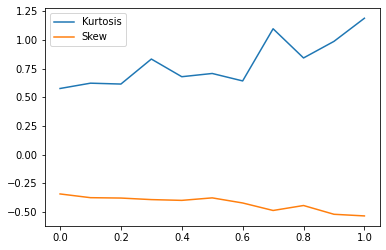

In [3]:
axd = [i/10 for i in range(11)]
arr = []
for i in axd:
    temp = pd.read_csv('old/ax_delay_many_to_one_'+str(i)+'.csv',index_col=[0])
    arr.append(temp.values.flatten())

arr = np.array(arr)
plt.plot(axd,kurtosis(arr[:,2:],axis =1),label = 'Kurtosis')
plt.plot(axd,skew(arr[:,2:],axis =1),label = 'Skew')
plt.legend()
plt.show()

In [162]:
check = np.random.normal(loc = 70, scale=1000, size=25)
shapiro(check)

ShapiroResult(statistic=0.9515131711959839, pvalue=0.27113404870033264)

In [4]:
wasserstein_distance(arr[2,2:], arr[8,:])

0.7843622514749984

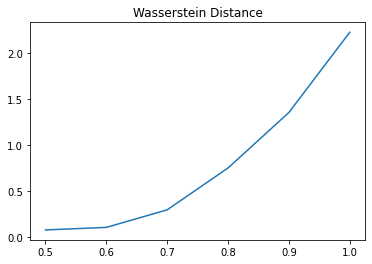

In [11]:
dist = [wasserstein_distance(arr[5,2:], arr[i,:]) for i in range(5,11)]
plt.plot(axd[5:],dist)
plt.title('Wasserstein Distance')
plt.show()

# compare for 2 differenct cases of correction & no correction 

* Using CLT take means of runs (n=25) check for normality
* if not, Ask Nida for other type of statistical test (for non normally distributed data)
* if it is normal, since equal sample size, t-test should be good
* Additionally chi square tests of mean can be performed